# Notes Before Running
---------

## About the datasets
### DataSet1: HuggingFace Recipe_nlg
- The file size is 2GB and is too large to be uploaded to GitHub
    1. Simply view our output information within the notebook
    2. Alternatively you can download the dataset yourself to run the notebook. 
- We used the Hugging Face Website for data collection
    1. Download the Hugging Face Recipe_NLG dataset
        - https://huggingface.co/datasets/recipe_nlg
        - datafile name is full_dataset.csv
- Variables:
    - **Title**: Names of different recipes, which seem to vary in types and styles.
    - **Ingredients**:Lists the required ingredients for each recipe.
    - **Directions**: Provides the steps or instructions to prepare the dish.
    - **Link**: Contains the web address (URL) of the recipe source.
    - **Source**: Indicates where the recipes were gathered from.
    - **NER**: Contains identified named entities within the ingredients,representing recognized entities like specific food items or categories.

### DataSet2: AllRecipe 
- allrecipes-complete-recipes-list-by-dmitriy-zub.json
    - https://www.kaggle.com/code/dimitryzub/allrecipes-analysis-dmitriy-zub
    - datafile name is allrecipes-complete-recipes-list-by-dmitriy-zub.json
    
- variables: 
    - **State**: 
    - **Title**:
    - **Ingredients**:
    - **Category**:
    - **State**:
    - **Rating**:
    - **Review Count**:
    - **Recipe Creator**:
    - **Prep Time**:
    - **Cook Time**:
    - **Total Time**:
    - **Servings**:
    - **Calories**:
    - **Fat**:
    - **Carbs**:
    - **Protein**:  

## Merging The Two Recipe Datasets
- Background:
    Two separate datasets containing recipe information were collected from the AllRecipes platform. These datasets were acquired independently but coincidentally shared the same name format or title conventions. To consolidate the information and work with a unified dataset, we've opted to merge these datasets into a single DataFrame.

- Reason for Merging:
    Creating a Comprehensive Dataset: By merging the datasets, we aim to create a consolidated, comprehensive dataset that encompasses a wider range of recipes, variations, and cooking styles available on the AllRecipes platform.

- Approach:
    The merging process involves combining the rows from both datasets based on a common attribute, such as recipe titles or unique identifiers. The resulting merged DataFrame combines the information from both datasets while retaining unique entries and eliminating duplicate information.

- Considerations:
    Data Consistency: Ensuring uniformity in the format and structure of the merged data to facilitate easy analysis and processing.
- Outcome:
    The merged DataFrame provides a consolidated view of recipes from the AllRecipes platform. It includes a broader spectrum of recipes under the same title format from the two initially separate datasets.

In [134]:
import Definitions
from importlib import reload
reload(Definitions)
#from Definitions import DataImporter, GenCustProd, SalesGenerator

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<module 'Definitions' from 'C:\\Users\\Stephanie\\Documents\\School\\8_Fall_2023\\5_Natural_Language_Processing\\assignments\\NLP_Recipe_Guide\\Definitions.py'>

# Imports

## Definitions.py

### save_file(df, name)
- Input:
    - df: DataFrame to be saved.
    - name: Name of the file to be saved.

- Functionality:
    - Retrieves the current directory and creates a folder named "Data" within it if it doesn't exist.
    - Specifies a file name and concatenates it with the directory to create a file path.
    - Attempts to save the DataFrame df to a CSV file at the specified file path.
    - Prints a success message if the file is saved, otherwise prints an error message.
  
### analyze_recipe(title, ingredients, directions)
- Input:
    - title: Recipe title.
    - ingredients: List of ingredients.
    - directions: List of cooking directions.
- Functionality:
    - Tokenizes the title and removes stop words and punctuation.
    - Performs sentiment analysis on the filtered title.
    - Creates bigrams from the words in the title.
    - Calculates the number of ingredients, words in directions, and their bigrams.
    - Performs Part-of-Speech (POS) tagging for parts of speech analysis in directions.
    - Counts occurrences of each part of speech and approximates the number of steps (verbs).
- Output:
    - Returns various analyzed aspects of the recipe: number of words in the title, title bigrams, sentiment polarity, subjectivity, number of ingredients, number of words in directions, directions' bigrams, POS tag counts, and estimated number of steps.

### add_features(df)
- Input:
    - df: DataFrame containing recipe data.
- Functionality:
    - Iterates through the DataFrame rows, extracting relevant information from columns like 'title', 'ner', and 'directions'.
    - Calls analyze_recipe for each row and collects the analyzed features.
    - Appends these features as new columns to the DataFrame.
- Output:
    - Returns the DataFrame with added columns of analyzed recipe features.
    
### extract_info(row)
- Input:
    - row: A row of recipe data.
- Functionality:
    - Dynamically extracts information such as preparation time, cooking time, total time, servings, and nutrition data from the input row.
    - Handles exceptions and returns a Pandas Series containing extracted information.
- Output:
    - Returns a Pandas Series with extracted recipe information.
    
### convert_to_minutes(time_string)
- Input:
    - time_string: String representing time.
- Functionality:
    - Converts time strings (with units like days, hours, and minutes) into total minutes.
    - Handles various time formats and units to calculate the total time in minutes.
- Output:
    - Returns the total time in minutes from the provided time string.

In [91]:
!pip install nltk

In [92]:
!pip install textblob

In [93]:
import pandas as pd
import zipfile
import os
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD
#from transformers import BertTokenizer, BertModel

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

import re
import json
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk import word_tokenize, pos_tag
from nltk.util import ngrams
from nltk.corpus import stopwords
import string
from collections import Counter
from textblob import TextBlob


# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

import ast

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stephanie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
!pip install wordcloud

In [95]:
from wordcloud import WordCloud

### If you are running the notebook, simply change the path to your full_dataset.csv file

In [96]:
#### MODIFY ####
# recipe_nlg path
path_to_file = r"C:\Users\Stephanie\Documents\School\8_Fall_2023\5_Natural_Language_Processing\assignments\NLP_Recipe_Guide_Data\full_dataset.csv"
path_to_folder = r"C:\Users\Stephanie\Documents\School\8_Fall_2023\5_Natural_Language_Processing\assignments\NLP_Recipe_Guide_Data"
# all recipe path
# this link should be within the cloned repository already
path_to_all_recipes = r'\Data\allrecipes-complete-recipes-list-by-dmitriy-zub.json'

# Load in Data

In [97]:
# read in data
# may take a few minutes, as the csv file is very large
recipe_nlg_df = pd.read_csv(path_to_file)
recipe_nlg_df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [98]:
recipe_nlg_df.shape

(2231142, 7)

In [99]:
file_path = r'\Data\allrecipes-complete-recipes-list-by-dmitriy-zub.json'
# all recipe data that will be used later
directory = os.getcwd()
# go into data folder and find the json file
json_file_path = directory+file_path
recipes = pd.read_json(json_file_path, orient='records')
recipes.head(2)

,state,basic_info,prep_data,ingridients,nutritions
0,Texas,"{'title': 'Slow Cooker Texas Pulled Pork', 'ca...","{'prep_time:': '15 mins', 'cook_time:': '5 hrs...","[1 teaspoon vegetable oil, 1 (4 pound) pork sh...","{'calories': '528', 'fat': '23g', 'carbs': '46..."
1,Texas,"{'title': 'Brazilian Grilled Pineapple', 'cate...","{'prep_time:': '10 mins', 'cook_time:': '10 mi...","[1 cup brown sugar, 2 teaspoons ground cinnamo...","{'calories': '255', 'fat': '0g', 'carbs': '66g..."


In [100]:
recipes.shape

(1798, 5)

# Inspect the Recipe_NLG Data (DataSet1)
- Size
- Display first few rows
- Data types of columns
- Look for missing or null values

In [101]:
recipe_nlg_df.shape
# 2231142 rows
# 7 columns

(2231142, 7)

In [102]:
recipe_nlg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB


In [103]:
# no null values
null_df = recipe_nlg_df[recipe_nlg_df.isnull().all(axis=1)]
len(null_df)

0

## Data Cleaning
- column headers
- remove Unnamed Column

In [104]:
recipe_nlg_df.columns = recipe_nlg_df.columns.str.lower().str.strip()

In [105]:
recipe_nlg_df.drop('unnamed: 0', inplace=True, axis = 1)

In [106]:
recipe_nlg_df.head(2)

,title,ingredients,directions,link,source,ner
0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."


## Subset Recip_nlg_df based on if the link is from All Recipes

In [107]:
all_recipes_df = recipe_nlg_df[recipe_nlg_df['link'].str.contains('www.allrecipes.com/recipe/')]

In [108]:
all_recipes_df.shape
# 61k rows

(61398, 6)

In [109]:
# If you want to save the df to your folder, use the below line
# This file is too large for GitHub, so that is why it is commented out
#Definitions.save_file(all_recipes_df, 'all_recipes_df.csv')

# Inspect The All Recipe Data Set (DataSet2)

In [110]:
recipes.head(2)

,state,basic_info,prep_data,ingridients,nutritions
0,Texas,"{'title': 'Slow Cooker Texas Pulled Pork', 'ca...","{'prep_time:': '15 mins', 'cook_time:': '5 hrs...","[1 teaspoon vegetable oil, 1 (4 pound) pork sh...","{'calories': '528', 'fat': '23g', 'carbs': '46..."
1,Texas,"{'title': 'Brazilian Grilled Pineapple', 'cate...","{'prep_time:': '10 mins', 'cook_time:': '10 mi...","[1 cup brown sugar, 2 teaspoons ground cinnamo...","{'calories': '255', 'fat': '0g', 'carbs': '66g..."


## Data Cleaning
- separate basic_info into 6 columns
    - title
    - category
    - rating
    - rating count
    - reviews
    - recipe by
- separate prep_data into 3 columns
    - prep time
    - cook time
    - total time
- separate nutritions into 4 columns
    - calories
    - fat
    - carb
    - protein
- make total time variable
- remove grams from calories, fat, carbs, protein

In [111]:
# Apply the extracted data function to each row of the DataFrame
extracted_data = recipes.apply(Definitions.extract_info, axis=1)

# Display the extracted data
extracted_data.head(2)

,state,title,ingredients,category,rating,reviews,recipe creator,prep_time,cook_time,total_time,servings,calories,fat,carbs,protein
0,Texas,Slow Cooker Texas Pulled Pork,"[1 teaspoon vegetable oil, 1 (4 pound) pork sh...",Main Dishes,\n4.5,"\n2,214 Reviews",cmccreight,15 mins,5 hrs,5 hrs 15 mins,8,528,23g,46g,32g
1,Texas,Brazilian Grilled Pineapple,"[1 cup brown sugar, 2 teaspoons ground cinnamo...",Side Dish,\n4.9,\n68 Reviews,SoccerNut,10 mins,10 mins,20 mins,6,255,0g,66g,1g


In [112]:
# Removing \n from the rating and reviews column data
extracted_data['rating'] = extracted_data['rating'].apply(lambda x: x.replace('\n', '') if x else None)
extracted_data['reviews'] = extracted_data['reviews'].apply(lambda x: x.replace('\n', '') if x else None)
# changing review count to be the number rather than string (from 12 Recipes to 12)
extracted_data['reviews'] = extracted_data['reviews'].str.replace(' Reviews', '')
extracted_data = extracted_data.rename(columns={'reviews': 'review_count'})
# changing variables to numeric
extracted_data['rating'] = pd.to_numeric(extracted_data['rating'], errors='coerce')
extracted_data['review_count'] = pd.to_numeric(extracted_data['review_count'], errors='coerce')
extracted_data['servings'] = pd.to_numeric(extracted_data['servings'], errors='coerce')
extracted_data['calories'] = pd.to_numeric(extracted_data['calories'], errors='coerce')
# removing all recipes with null values
no_null = extracted_data.dropna()
no_null_df = no_null.reset_index(drop=True)
no_null_df.head(5)

,state,title,ingredients,category,rating,review_count,recipe creator,prep_time,cook_time,total_time,servings,calories,fat,carbs,protein
0,Texas,Brazilian Grilled Pineapple,"[1 cup brown sugar, 2 teaspoons ground cinnamo...",Side Dish,4.9,68.0,SoccerNut,10 mins,10 mins,20 mins,6.0,255.0,0g,66g,1g
1,Texas,Soul Smothered Chicken,"[½ cup butter, 1 whole chicken, cut into piece...",Meat and Poultry,4.7,375.0,Veronica Rockett,15 mins,1 hrs,1 hrs 15 mins,8.0,372.0,23g,22g,19g
2,Texas,Slow Cooker Texas Smoked Beef Brisket,"[3 tablespoons smoked paprika, 2 tablespoons g...",Main Dishes,4.3,81.0,Sandy Clark Gerhardt,10 mins,6 hrs,6 hrs 50 mins,4.0,342.0,16g,29g,22g
3,Texas,Best-Ever Texas Caviar,"[2 (15 ounce) cans black beans, rinsed and dra...",Dips and Spreads Recipes,4.7,186.0,Cassie Cooper,25 mins,5 mins,40 mins,10.0,262.0,12g,36g,6g
4,Texas,Texas Sausage Kolaches (Klobasneks),"[½ cup milk, ½ cup white sugar, ¼ cup unsalted...",Appetizers and Snacks,4.9,20.0,Krissi Abbott,45 mins,15 mins,2 hrs 10 mins,20.0,264.0,13g,27g,9g


In [113]:
# convert times to minutes
for column in ['total_time', 'prep_time','cook_time']:
    no_null_df[column]=no_null_df[column].apply(Definitions.convert_to_minutes)

In [114]:
no_null_df.head(2)

,state,title,ingredients,category,rating,review_count,recipe creator,prep_time,cook_time,total_time,servings,calories,fat,carbs,protein
0,Texas,Brazilian Grilled Pineapple,"[1 cup brown sugar, 2 teaspoons ground cinnamo...",Side Dish,4.9,68.0,SoccerNut,10,10,20,6.0,255.0,0g,66g,1g
1,Texas,Soul Smothered Chicken,"[½ cup butter, 1 whole chicken, cut into piece...",Meat and Poultry,4.7,375.0,Veronica Rockett,15,60,75,8.0,372.0,23g,22g,19g


In [115]:
# converting health grams
cols = ['fat','carbs','protein']
for col in cols:
    no_null_df[col] = no_null_df[col].str.replace('g', '').astype(int)

In [116]:
no_null_df.head(2)

,state,title,ingredients,category,rating,review_count,recipe creator,prep_time,cook_time,total_time,servings,calories,fat,carbs,protein
0,Texas,Brazilian Grilled Pineapple,"[1 cup brown sugar, 2 teaspoons ground cinnamo...",Side Dish,4.9,68.0,SoccerNut,10,10,20,6.0,255.0,0,66,1
1,Texas,Soul Smothered Chicken,"[½ cup butter, 1 whole chicken, cut into piece...",Meat and Poultry,4.7,375.0,Veronica Rockett,15,60,75,8.0,372.0,23,22,19


In [117]:
# if you want to save this file, run the code below
# Definitions.save_file(no_null_df,'no_null_df.csv')

# Merging The Two DataFrames

In [118]:
# merge
whole_df = pd.merge(no_null_df, 
                    all_recipes_df, 
                    on = 'title',
                    how = 'inner')

In [119]:
whole_df.shape
# 800 rows
# 20 columns

(800, 20)

In [120]:
whole_df.head(2)

,state,title,ingredients_x,category,rating,review_count,recipe creator,prep_time,cook_time,total_time,servings,calories,fat,carbs,protein,ingredients_y,directions,link,source,ner
0,Texas,Brazilian Grilled Pineapple,"[1 cup brown sugar, 2 teaspoons ground cinnamo...",Side Dish,4.9,68.0,SoccerNut,10,10,20,6.0,255.0,0,66,1,"[""1 cup brown sugar"", ""2 teaspoons ground cinn...","[""Preheat an outdoor grill for medium-high hea...",www.allrecipes.com/recipe/235932/brazilian-gri...,Gathered,"[""brown sugar"", ""ground cinnamon"", ""pineapple""]"
1,Texas,Soul Smothered Chicken,"[½ cup butter, 1 whole chicken, cut into piece...",Meat and Poultry,4.7,375.0,Veronica Rockett,15,60,75,8.0,372.0,23,22,19,"[""1/2 cup butter"", ""1 whole chicken, cut into ...","[""Melt the butter in a large skillet over medi...",www.allrecipes.com/recipe/83302/soul-smothered...,Gathered,"[""butter"", ""chicken"", ""salt"", ""ground black pe..."


In [121]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           800 non-null    object 
 1   title           800 non-null    object 
 2   ingredients_x   800 non-null    object 
 3   category        800 non-null    object 
 4   rating          800 non-null    float64
 5   review_count    800 non-null    float64
 6   recipe creator  800 non-null    object 
 7   prep_time       800 non-null    int64  
 8   cook_time       800 non-null    int64  
 9   total_time      800 non-null    int64  
 10  servings        800 non-null    float64
 11  calories        800 non-null    float64
 12  fat             800 non-null    int32  
 13  carbs           800 non-null    int32  
 14  protein         800 non-null    int32  
 15  ingredients_y   800 non-null    object 
 16  directions      800 non-null    object 
 17  link            800 non-null    obj

# Feature Engineering

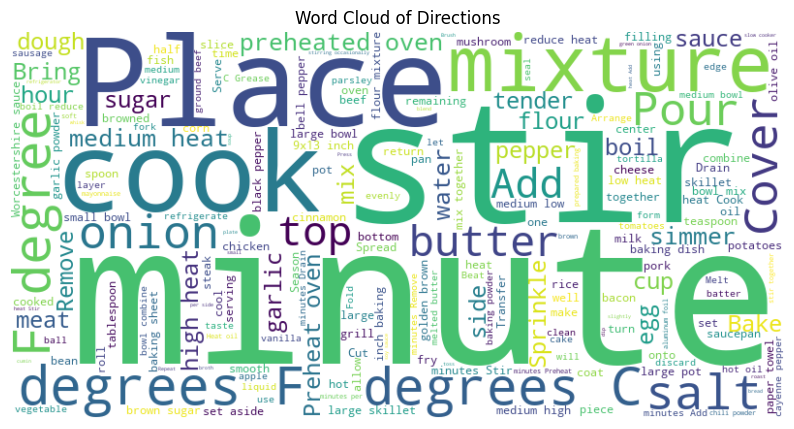

In [122]:
directions = whole_df['directions'].dropna().str.cat(sep=' ')

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(directions)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Directions')
plt.show()

The above word cloud serves as logical explaination and inspiration for the bigram_directions creation. Minutes, Degrees F/C are all treated as separate tokens, but they are commonly occuring so with cooking so they do not have much information to share. 

\# minute, degrees F, and degrees C will all be treated as one word for bigram analysis purposes

In [123]:
whole_df_featured_df = Definitions.add_features(whole_df)

In [124]:
whole_df_featured_df.head(2)

,state,title,ingredients_x,category,rating,review_count,recipe creator,prep_time,cook_time,total_time,...,ner,num_words_title,bigrams_title,subjectivity,polarity,num_ingredients,num_words_directions,bigrams_directions,pos_counts,num_steps
0,Texas,Brazilian Grilled Pineapple,"[1 cup brown sugar, 2 teaspoons ground cinnamo...",Side Dish,4.9,68.0,SoccerNut,10,10,20,...,"[""brown sugar"", ""ground cinnamon"", ""pineapple""]",3,"[(Brazilian, Grilled), (Grilled, Pineapple)]",0.0,0.0,3,63,"[(preheat, outdoor), (outdoor, grill), (grill,...","{'NNP': 5, 'DT': 6, 'NN': 16, 'IN': 8, 'JJ': 6...",2
1,Texas,Soul Smothered Chicken,"[½ cup butter, 1 whole chicken, cut into piece...",Meat and Poultry,4.7,375.0,Veronica Rockett,15,60,75,...,"[""butter"", ""chicken"", ""salt"", ""ground black pe...",3,"[(Soul, Smothered), (Smothered, Chicken)]",-0.6,-0.6,14,142,"[(melt, butter), (butter, large), (large, skil...","{'NNP': 7, 'DT': 8, 'NN': 36, 'IN': 13, 'JJ': ...",7


In [125]:
Definitions.save_file(whole_df_featured_df, 'merged_df_featured.csv')

File 'merged_df_featured.csv' saved to 'C:\Users\Stephanie\Documents\School\8_Fall_2023\5_Natural_Language_Processing\assignments\NLP_Recipe_Guide\Data'


In [126]:
whole_df_featured_df.shape

(800, 29)

# Visualizing Data
## Bigrams

In [127]:
# Convert string representation of list of tuples to actual list of tuples
#whole_df_featured_df['bigrams_directions'] = whole_df_featured_df['bigrams_directions'].apply(ast.literal_eval)

# Flatten the list of bigrams across all recipes
all_bigrams = [bigram for bigram_list in whole_df_featured_df['bigrams_directions'] for bigram in bigram_list]

# Get the frequency count of each bigram
bigram_counts = Counter(all_bigrams)

In [128]:
bigram_counts

Counter({('preheat', 'oven'): 337,
         ('preheated', 'oven'): 283,
         ('medium', 'heat'): 270,
         ('salt', 'pepper'): 213,
         ('reduce', 'heat'): 178,
         ('bake', 'preheated'): 175,
         ('set', 'aside'): 171,
         ('350degree', '175degree'): 168,
         ('oven', '350degree'): 158,
         ('cook', 'stir'): 151,
         ('baking', 'dish'): 148,
         ('large', 'bowl'): 146,
         ('medium-high', 'heat'): 135,
         ('large', 'skillet'): 135,
         ('bring', 'boil'): 126,
         ('brown', 'sugar'): 120,
         ('large', 'pot'): 115,
         ('golden', 'brown'): 115,
         ('baking', 'sheet'): 114,
         ('skillet', 'medium'): 106,
         ('oven', 'minute'): 101,
         ('high', 'heat'): 100,
         ('olive', 'oil'): 98,
         ('minute', 'stir'): 98,
         ('bowl', 'mix'): 98,
         ('black', 'pepper'): 92,
         ('cook', 'minute'): 88,
         ('heat', 'oil'): 88,
         ('1/2', 'cup'): 87,
         ('o

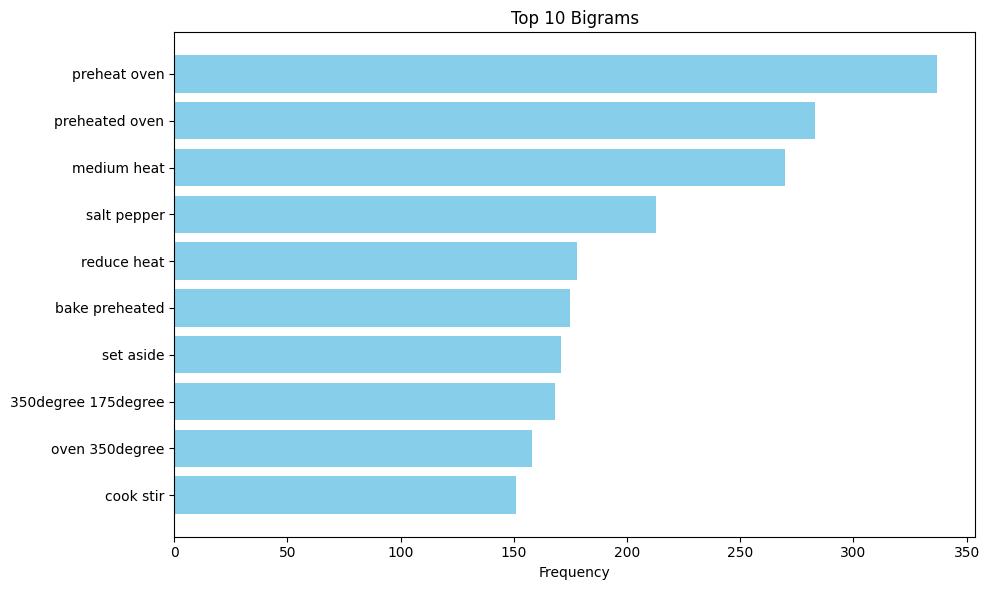

In [129]:
# Extract top N frequent bigrams and their counts
top_n = 10  # Change this value to visualize more or fewer top bigrams
top_bigrams = bigram_counts.most_common(top_n)

# Extract data for plotting
bigram_labels = [f"{bigram[0][0]} {bigram[0][1]}" for bigram in top_bigrams]
bigram_counts = [count for _, count in top_bigrams]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(bigram_labels, bigram_counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top ' + str(top_n) + ' Bigrams')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent bigrams at the top
plt.tight_layout()
plt.show()

# Exploring Categorical Variables
- count the requency of each category
- visualize the distributions using bar charts or pie charts

In [131]:
whole_df_featured_df.head(1)

,state,title,ingredients_x,category,rating,review_count,recipe creator,prep_time,cook_time,total_time,...,ner,num_words_title,bigrams_title,subjectivity,polarity,num_ingredients,num_words_directions,bigrams_directions,pos_counts,num_steps
0,Texas,Brazilian Grilled Pineapple,"[1 cup brown sugar, 2 teaspoons ground cinnamo...",Side Dish,4.9,68.0,SoccerNut,10,10,20,...,"[""brown sugar"", ""ground cinnamon"", ""pineapple""]",3,"[(Brazilian, Grilled), (Grilled, Pineapple)]",0.0,0.0,3,63,"[(preheat, outdoor), (outdoor, grill), (grill,...","{'NNP': 5, 'DT': 6, 'NN': 16, 'IN': 8, 'JJ': 6...",2


# Distribution of State and Category

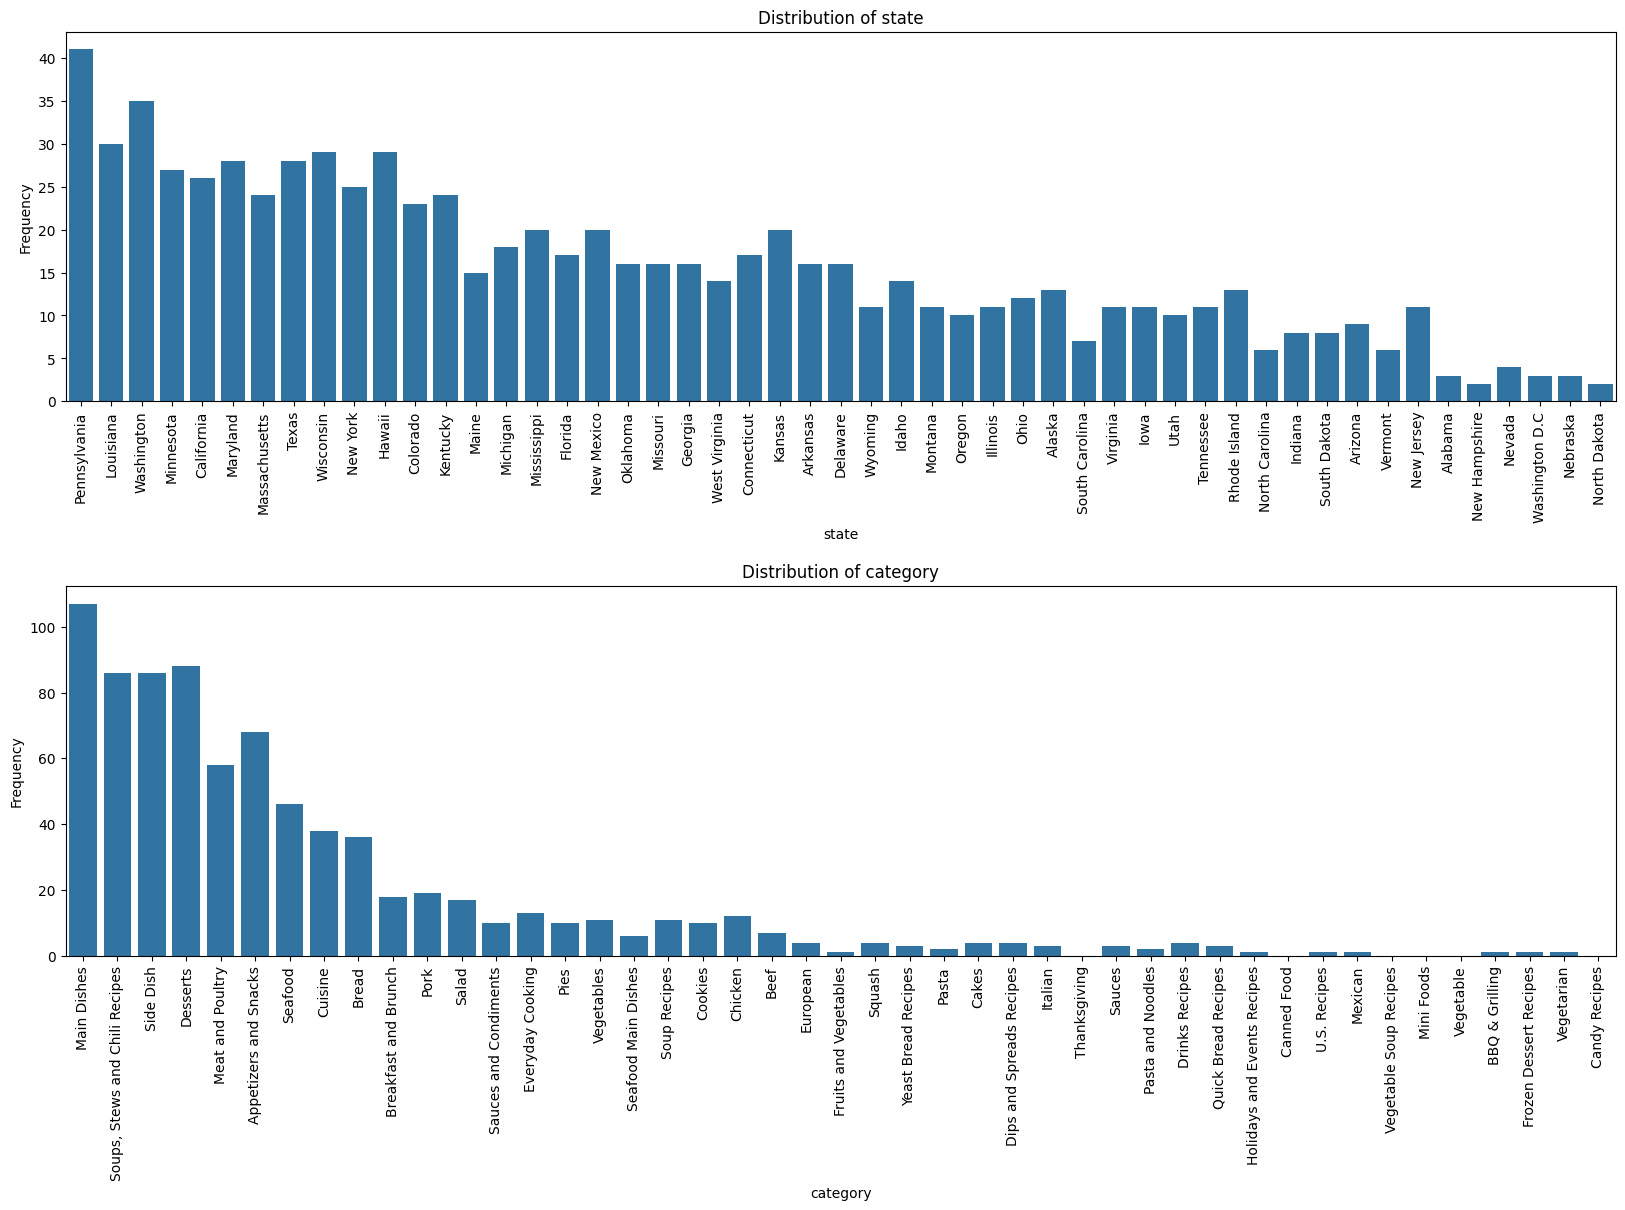

In [137]:
# Select categorical columns for distribution analysis
categorical_columns = ['state', 'category']  # Add other categorical columns as needed

# Set up subplots for each categorical feature
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(20, 6 * len(categorical_columns)))
plt.subplots_adjust(hspace=0.5)

# Plotting distributions
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(data=whole_df_featured_df, x=column, ax=axes[i], order=no_null_df[column].value_counts().index)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

plt.show()

In [141]:
# checking numerical columns to visualize
whole_df_featured_df.columns

Index(['state', 'title', 'ingredients_x', 'category', 'rating', 'review_count',
       'recipe creator', 'prep_time', 'cook_time', 'total_time', 'servings',
       'calories', 'fat', 'carbs', 'protein', 'ingredients_y', 'directions',
       'link', 'source', 'ner', 'num_words_title', 'bigrams_title',
       'subjectivity', 'polarity', 'num_ingredients', 'num_words_directions',
       'bigrams_directions', 'pos_counts', 'num_steps'],
      dtype='object')

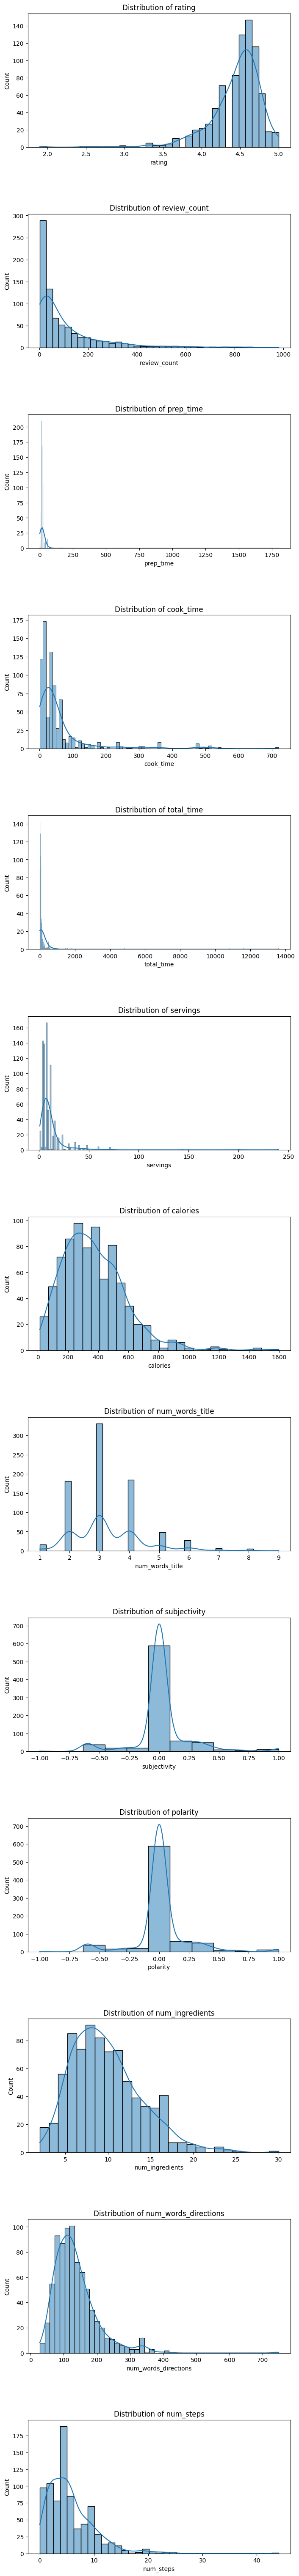

In [139]:
# Select numerical columns for distribution analysis
numerical_columns = ['rating', 'review_count', 'prep_time', 'cook_time', 'total_time', 'servings', 'calories', 'num_words_title','subjectivity','polarity', 'num_ingredients','num_words_directions','num_steps']

# Set up subplots for each numerical feature
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 6 * len(numerical_columns)))
plt.subplots_adjust(hspace=0.5)

# Plotting distributions
for i, column in enumerate(numerical_columns):
    ax = sns.histplot(whole_df[column].dropna(), kde=True, ax=axes[i])
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

plt.show()

# Edit below

# Clustering
# Unsupervised Learning
- https://projector.tensorflow.org/
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html


In [ ]:
# Combine 'title', 'directions', and 'ingredients' into a single text field for clustering
whole_df['combined_text'] = whole_df['title'] + ' ' + whole_df['directions'] + ' ' + whole_df['ner']


    # word to vec here
    # sentence bert from hugging face instead of tfidf get embeddings back 1024 length. text in recipe
    # use tsne transformation
    # results in length 3 for each recipe
    # do the clustering on these 3. 

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_tokens(text):
    tokens = tokenizer.encode(text, add_special_tokens=True,return_tensors='pt')
    # Get BERT embeddings for each token
    with torch.no_grad():
        outputs = model(tokens)
        embeddings = outputs.last_hidden_state
    return embeddings

whole_df['embeddings'] = whole_df['combined_text'].apply(get_tokens)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

C:\Users\Stephanie\anaconda3\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Stephanie\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

ImportError: 
BertModel requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [ ]:
# Combine 'title', 'directions', and 'ingredients' into a single text field for clustering
whole_df['combined_text'] = whole_df['title'] + ' ' + whole_df['directions'] + ' ' + whole_df['ner']

# Text preprocessing
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

    # word to vec here
    # sentence bert from hugging face instead of tfidf get embeddings back 1024 length. text in recipe
    # use tsne transformation
    # results in length 3 for each recipe
    # do the clustering on these 3. 


whole_df['combined_tokens'] = whole_df['combined_text'].apply(preprocess_text)

# Convert tokenized text into TF-IDF matrix
tfidf = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix = tfidf.fit_transform(whole_df['combined_tokens'])

# K-Means clustering
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the DataFrame
whole_df['cluster_label'] = kmeans.labels_

# Displaying cluster assignments
cluster_results = pd.DataFrame({
    'Recipe': whole_df['title'],
    'Cluster': whole_df['cluster_label']
})

print(cluster_results)

                                       Recipe  Cluster
0                 Brazilian Grilled Pineapple        1
1                      Soul Smothered Chicken        4
2       Slow Cooker Texas Smoked Beef Brisket        1
3                      Best-Ever Texas Caviar        4
4                   South Texas Carne Guisada        4
..                                        ...      ...
795                        Hawaiian Beef Stew        4
796                  Hawaiian Pork Tenderloin        2
797                        Hawaiian Loco Moco        2
798                               Easy Haupia        2
799  Mouthwateringly Tangy Pineapple Meatloaf        3

[800 rows x 2 columns]


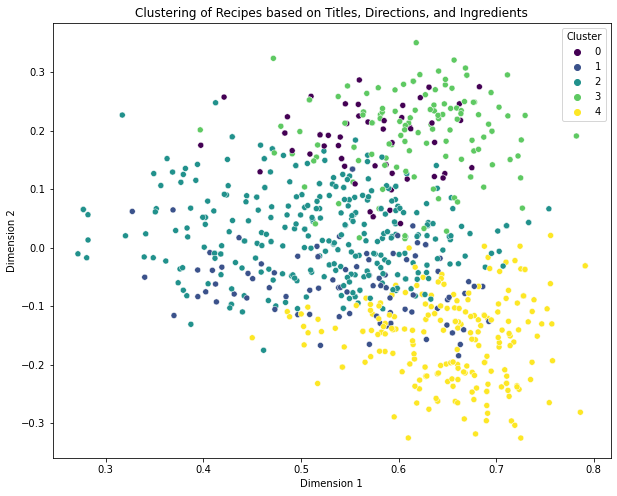

In [ ]:
# Dimensionality reduction for visualization (if the TF-IDF matrix is high-dimensional)
svd = TruncatedSVD(n_components=2, random_state=42)
tfidf_matrix_reduced = svd.fit_transform(tfidf_matrix)

# Add cluster labels and reduced dimensions to DataFrame
whole_df['X'] = tfidf_matrix_reduced[:, 0]
whole_df['Y'] = tfidf_matrix_reduced[:, 1]

# Plotting clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='cluster_label', palette='viridis', data=whole_df, legend='full')
plt.title('Clustering of Recipes based on Titles, Directions, and Ingredients')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Calculate TF-IDF matrix
tfidf = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix = tfidf.fit_transform(whole_df['combined_tokens'])

# K-Means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the DataFrame
whole_df['cluster_label'] = kmeans.labels_

# Calculate Cluster Centroid
cluster_centroids = kmeans.cluster_centers_

# Count in Cluster
count_in_cluster = whole_df['cluster_label'].value_counts().sort_index()

# Assign Cluster ID
whole_df['cluster_id'] = whole_df['cluster_label'] + 1  # Adding 1 to start cluster ID from 1

# Add Cluster Centroid, Count in Cluster, and Cluster ID to a new DataFrame
cluster_summary = pd.DataFrame({
    'Cluster ID': whole_df['cluster_id'].unique(),
    'Count in Cluster': count_in_cluster.values,
    'Cluster Centroid': cluster_centroids.tolist()
})

print(cluster_summary)

   Cluster ID  Count in Cluster  \
0           2                57   
1           5                88   
2           3               310   
3           4               127   
4           1               218   

                                    Cluster Centroid  
0  [0.0013774648202881266, 0.2223092165275084, 0....  
1  [0.0018861829977333323, 0.2280778899057622, 0....  
2  [0.003035928860676614, 0.21463691448560612, 0....  
3  [0.004107881852959814, 0.2838460087931866, 0.0...  
4  [0.00048266588256562455, 0.2856110458690967, 0...  


# Other Ideas


##  Recipe Title Analysis:
- Similar to the analysis done on the recipe directions, you can tokenize the recipe titles, count words, extract bigrams, or even perform sentiment analysis on the titles.

## Ingredient Analysis:
- You can further analyze ingredients, such as identifying common ingredients, categorizing them (e.g., protein, vegetable, seasoning), or conducting sentiment analysis to understand the tone associated with certain ingredients.

## Recipe Difficulty or Complexity:
- You might develop a metric to estimate the difficulty or complexity of the recipe based on the number of steps, variety of ingredients, or the sophistication of the language used in the instructions.

## Time Estimation:
- Analyze the recipe steps to estimate the time required to prepare the dish.

## Tools or Equipment Required:
- Extract information about tools or equipment needed (e.g., saucepan, baking sheet) by analyzing the recipe steps.

## Nutritional Analysis: 
- If ingredient quantities are included, you could estimate nutritional information for the recipe, such as calorie count, macronutrients, etc.

## Perform text preprocessing (lowercasing, tokenization, etc.)
- Analyze most frequent words or ingredients using word clouds, frequency distributions, or bar charts.
- Explore n-grams (sequences of words) to understand common ingredient combinations or recipe titles.

In [ ]:
## What are the groupings of different recipes

## Segment them based on the different ingredients
## May help with cuisine identification

# generate variables
- health score
- cuisine type

In [ ]:
# finding similar recipes
# cosine similarity

# Combine 'Title', 'Ingredients', 'Directions' into a single text column for each recipe
df['combined_features'] = df['title'] + ' ' + df['ingredients'] + ' ' + df['directions']

# Use TF-IDF to vectorize the combined features
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Calculate cosine similarity between recipes
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get similar recipes based on cosine similarity
def get_similar_recipes(recipe_id, similarity_matrix, threshold=0.5):
    similar_recipes = []
    for idx, score in enumerate(similarity_matrix[recipe_id]):
        if idx != recipe_id and score >= threshold:
            similar_recipes.append((idx, score))
    return similar_recipes

# Example: Get similar recipes for Recipe 1 (adjust the recipe_id accordingly)
recipe_id = 0  # Change the recipe ID to find similar recipes for a different recipe
similar_recipes = get_similar_recipes(recipe_id, cosine_sim)

# Display similar recipes
print(f"Similar recipes for {df['title'][recipe_id]}:")
for recipe in similar_recipes:
    print(f"Recipe: {df['title'][recipe[0]]}, Similarity Score: {recipe[1]}")